## Credit Card Fraud Detection Project
### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders. Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions.

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.

## Data Exploration
It is discovered that the dataset has missing values, data preprocessing is as follows:

1. Dropping the missing values
2. Standardizing data
3. Removal of extreme outliers, consider: IQR=Q3-Q1.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('./dataset/creditcard_train.csv')


# drop missing values
data = data.dropna()

#Standardization 
from sklearn.preprocessing import StandardScaler
data['Amount'] =  StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# T replace to 1, mean existing fraud case
data["Class"].replace({1: "Fraud", 0: "Normal"}, inplace=True)

data_Normal= data[data.Class != "Fraud"] 
data_Fraud= data[data.Class != "Normal"] 

# fing IQR
Q1 = data_Normal.quantile(q=.25)
Q3 = data_Normal.quantile(q=.75)
IQR = Q3-Q1
# drop extreme outliers 
data_Normal = data_Normal  [~(( data_Normal  < (Q1-2.5*IQR)) | ( data_Normal > (Q3+2.5*IQR))).any(axis=1)]

# fing IQR
Q1 = data_Fraud.quantile(q=.25)
Q3 = data_Fraud.quantile(q=.75)
IQR = Q3-Q1
# drop extreme outliers 
data_Fraud = data_Fraud  [~(( data_Fraud  < (Q1-2.5*IQR)) | ( data_Fraud > (Q3+2.5*IQR))).any(axis=1)]
New_Data = data_Normal.append(data_Fraud, ignore_index=True)

In [43]:
print("The dataset consist of 284657 rows and 31 columns")
data

The dataset consist of 284657 rows and 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244371,Normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342370,Normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.159004,Normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140065,Normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073618,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284652,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350037,Normal
284653,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,Normal
284654,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,-0.082044,Normal
284655,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,-0.313178,Normal


## Data Visualization
The distributions of variables between different group were vbisualized by using tables and figures.

In [44]:
%matplotlib inline
import seaborn as sns; sns.set()

### 1. The distributions of different variables

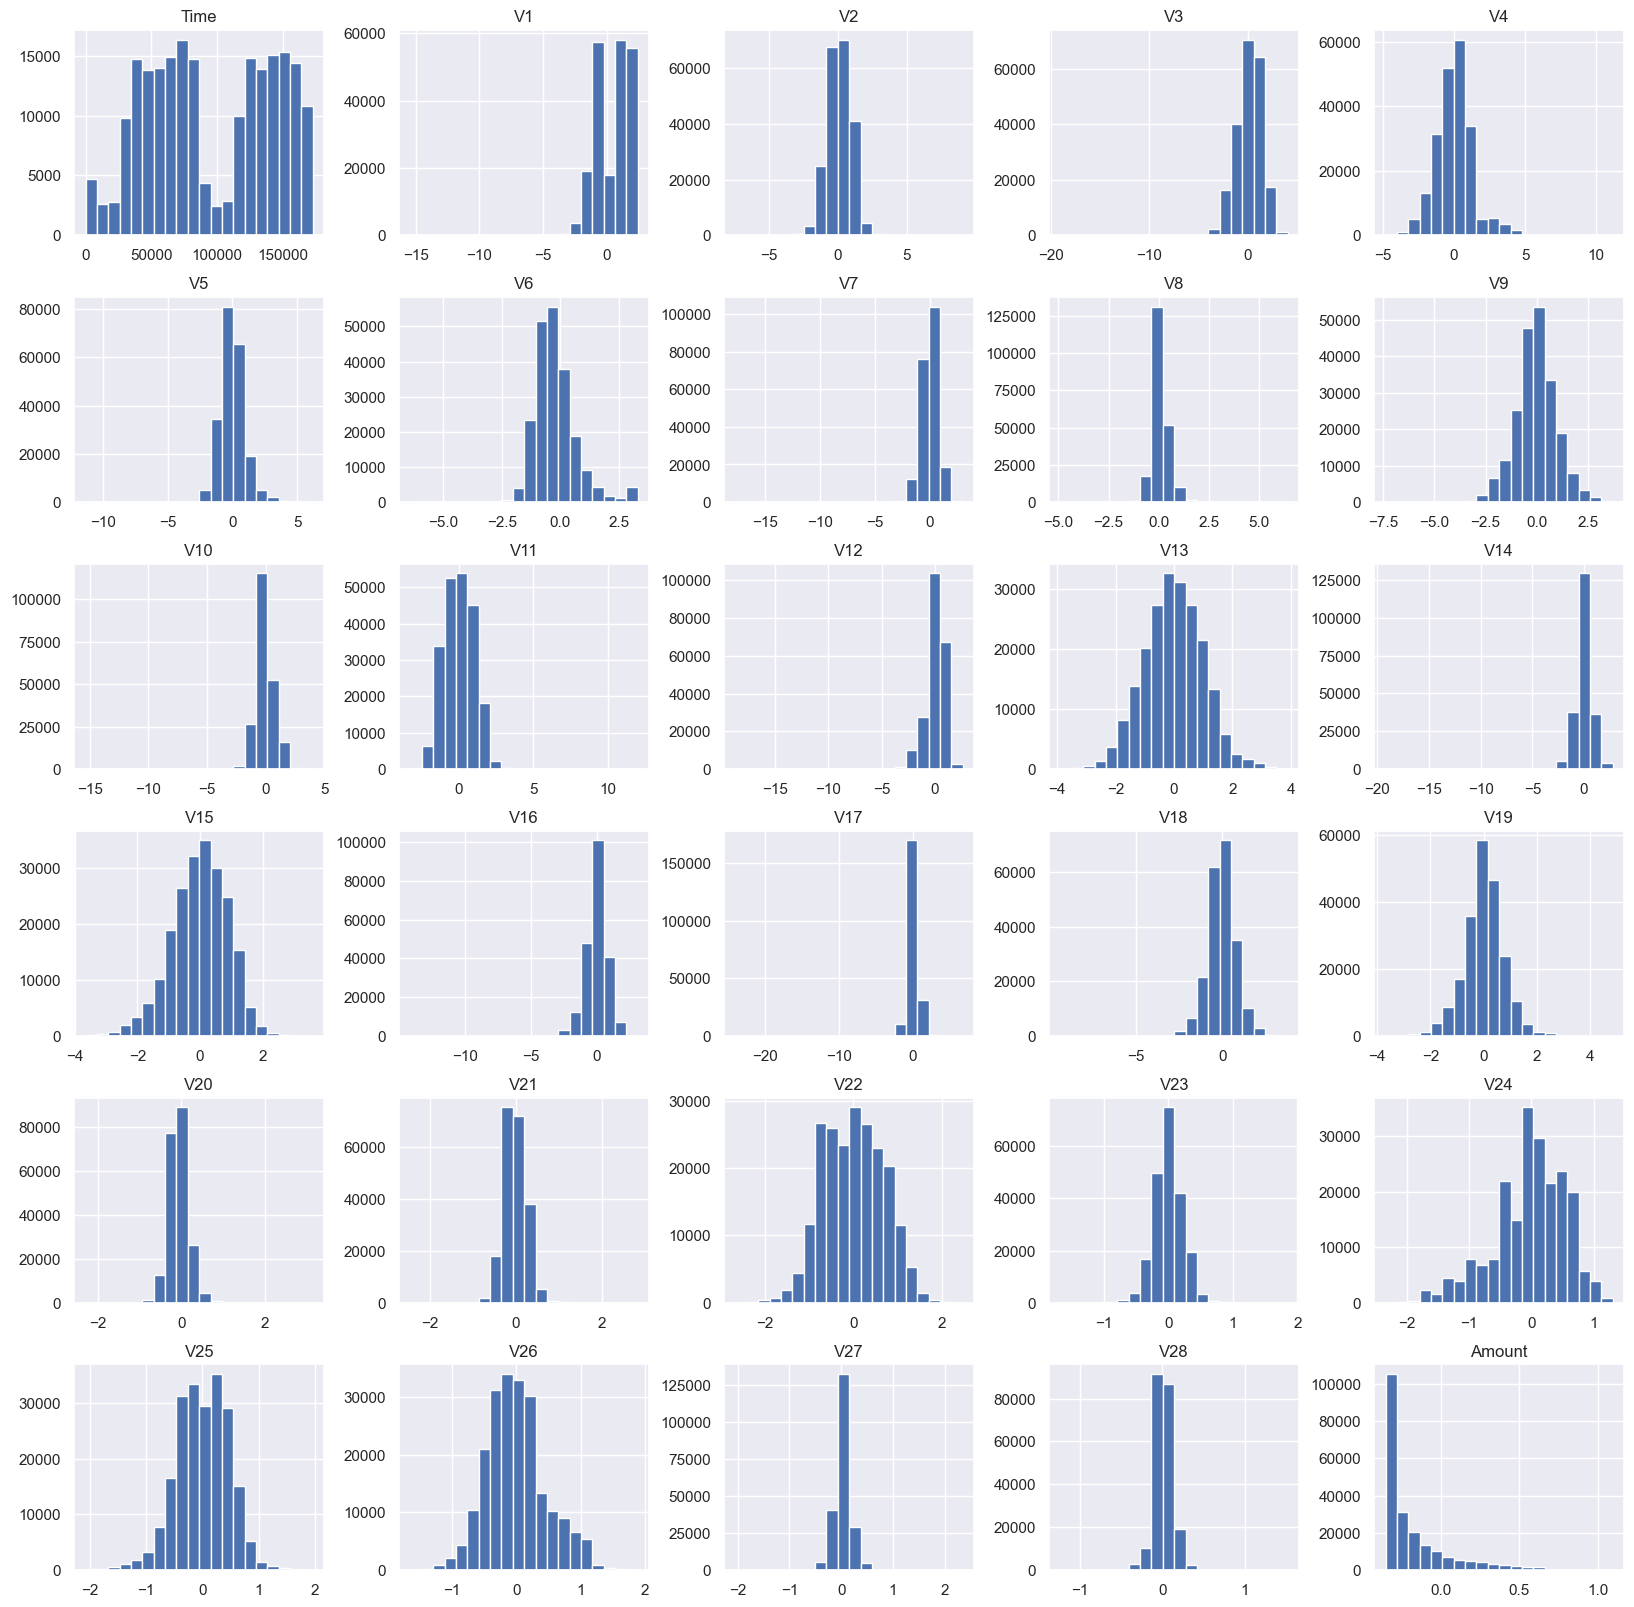

In [45]:
Data = New_Data.drop(['Class'], axis=1).hist(bins=20, figsize=(20,20))
plt.show()

### 2. Time distribution
It was found that credit card fraud is <b>more likely to occur at 2-5 a.m.<b>
   

Text(0.5, 1.0, 'Normal')

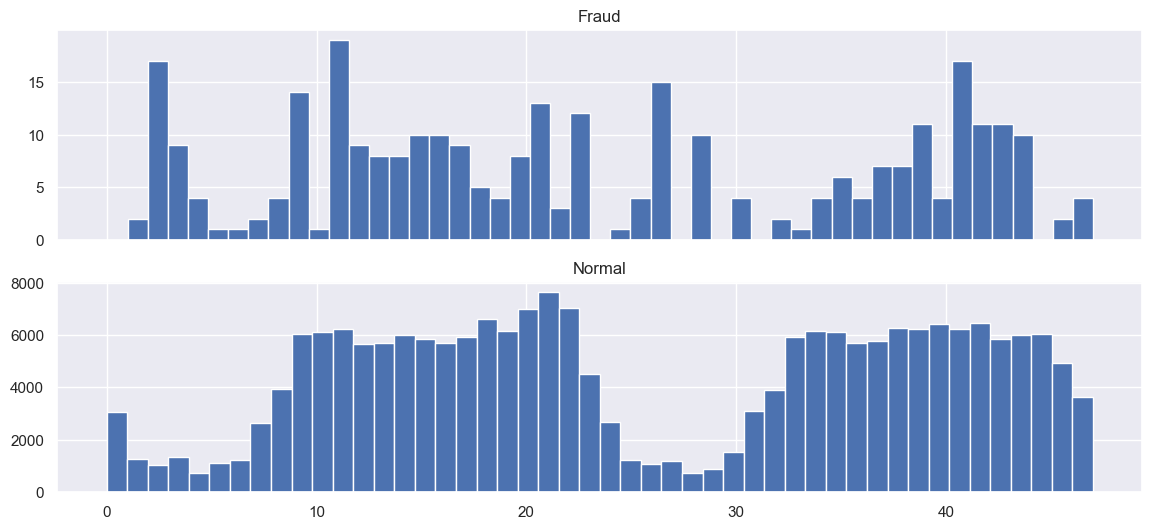

In [46]:
New_Data['hour'] = New_Data['Time'].apply(lambda x : divmod(x, 3600)[0])

fraud_data = New_Data[New_Data['Class']=="Fraud"]
normal_data = New_Data[New_Data['Class']=="Normal"]

f, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(14,6))
ax1.hist(fraud_data['hour'], bins=48)
ax1.set_title('Fraud')
ax2.hist(normal_data['hour'], bins=48)
ax2.set_title('Normal')

### 3. The variables distributed differently between Fraud group and Normal group.
It is found that <b>V2,V3,V4,V7,V8,V9,V10,V11,V12,V14,V16,V17,V20,V21</b> distributed more differently in the Fraud group and in the Normal group.

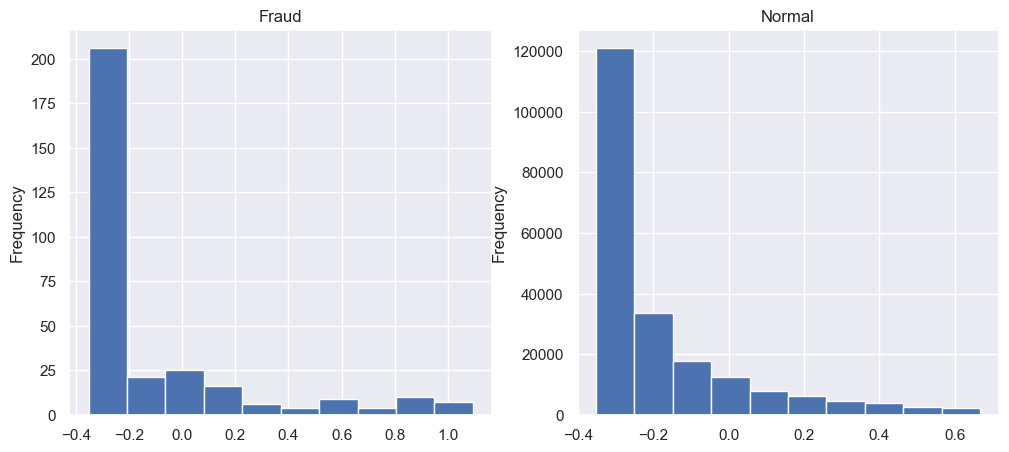

In [47]:
Fraud_tran = New_Data[New_Data["Class"]=="Fraud"]
Normal_tran= New_Data[New_Data["Class"]=="Normal"]
f, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
Fraud_tran.Amount.plot.hist(title='Fraud', ax=ax1)
Normal_tran.Amount.plot.hist(title='Normal', ax=ax2,bins=10)
plt.show()

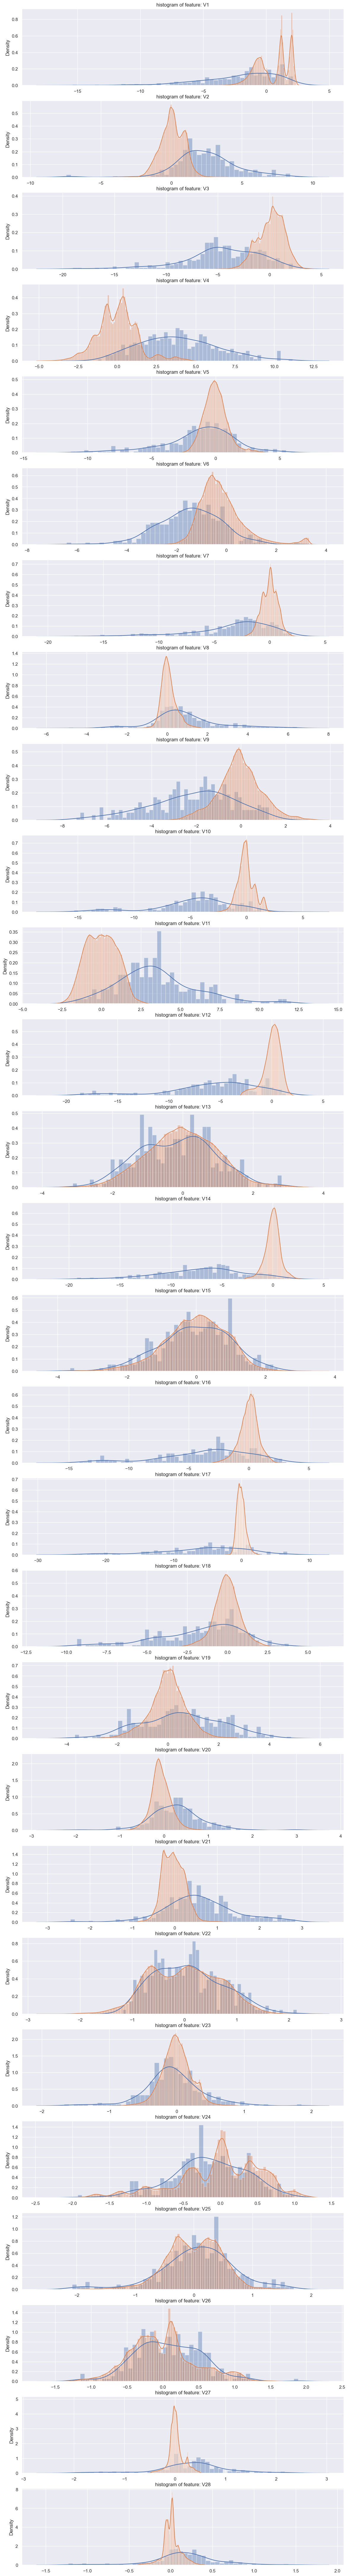

In [48]:
import matplotlib.gridspec as gridspec
v_feat = data.iloc[:,1:29].columns
plt.figure(figsize=(14, 28*4))
gs = gridspec.GridSpec(28,1)
for i, col in enumerate(v_feat):
    ax = plt.subplot(gs[i])
    sns.distplot(data_Fraud[col], bins=50)
    sns.distplot(data_Normal[col], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(col))
plt.savefig('fraud vs normal.png')

In [49]:
data_Fraud = data_Fraud.drop(['Time'], axis=1)
data_Normal= data_Normal.drop(['Time'], axis=1)

### Dimension Reduction
Apply unsupervised learning methods (Principal Component Analysis PCA) to achieve dimension reduction. Visualize and interpret the results.

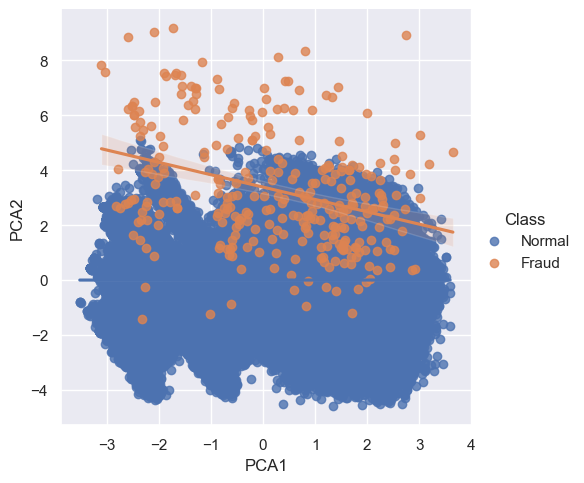

In [50]:
New_Data = data_Normal.append(data_Fraud, ignore_index=True)

XNew_Data = New_Data.drop("Class", axis=1)
XNew_Data

from sklearn.decomposition import PCA 
model = PCA(n_components=2) 
model.fit(XNew_Data) 
X_2D = model.transform(XNew_Data) # 4. Transform the data to two dimensions

New_Data['PCA1'] = X_2D[:, 0]
New_Data['PCA2'] = X_2D[:, 1]
sns.lmplot(data=New_Data, x = "PCA1", y = "PCA2", hue='Class')

### Classification
Apply three classification methods and build classification models.

Further, load creditcard_test.csv and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
testdata = pd.read_csv('./dataset/creditcard_test.csv')
testdata = testdata.drop(['Time'], axis=1)
testdata['Amount'] =  StandardScaler().fit_transform(testdata['Amount'].values.reshape(-1,1))
testdata.shape

(150, 30)

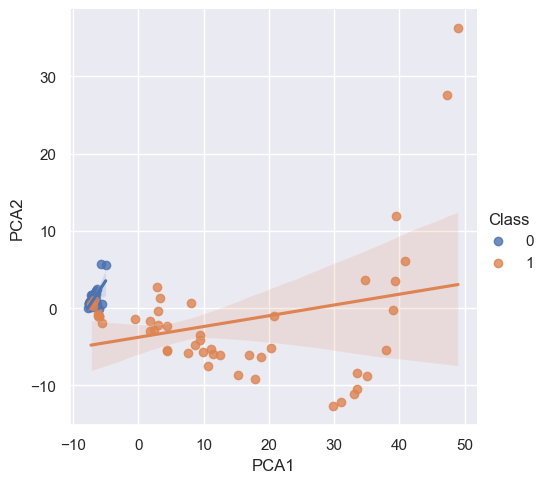

In [52]:
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(testdata) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(testdata) # 4. Transform the data to two dimensions
testdata['PCA1'] = X_2D[:, 0]
testdata['PCA2'] = X_2D[:, 1]
sns.lmplot(data=testdata, x = "PCA1", y = "PCA2", hue='Class')

In [61]:
New_Data["Class"].replace({"Fraud": 1, "Normal": 0}, inplace=True)
X_train = New_Data.drop("Class",1)
y_train = New_Data["Class"]
X_test = testdata.drop("Class",1)
y_test = testdata["Class"]

### LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

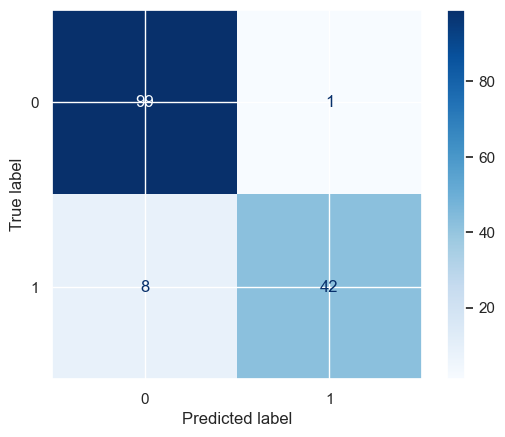

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       100
           1       0.98      0.84      0.90        50

    accuracy                           0.94       150
   macro avg       0.95      0.92      0.93       150
weighted avg       0.94      0.94      0.94       150



In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_score = lr.decision_function(X_test)
plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)  
plt.show() 

print(classification_report(y_test, y_pred))

### RandomForest

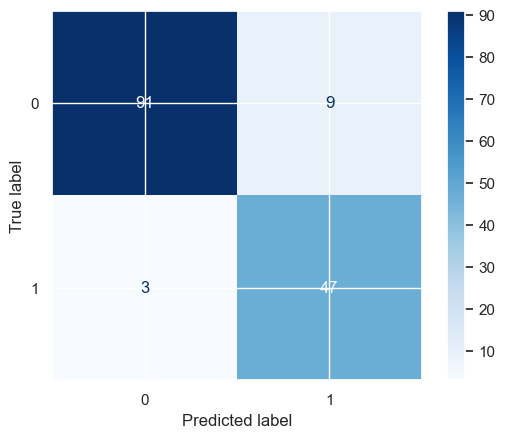

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       100
           1       0.84      0.94      0.89        50

    accuracy                           0.92       150
   macro avg       0.90      0.93      0.91       150
weighted avg       0.93      0.92      0.92       150



In [70]:
rf = RandomForestClassifier(n_jobs = -1,
                            random_state = 1)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:,1]
plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)  
plt.show() 

print(classification_report(y_test, y_pred))

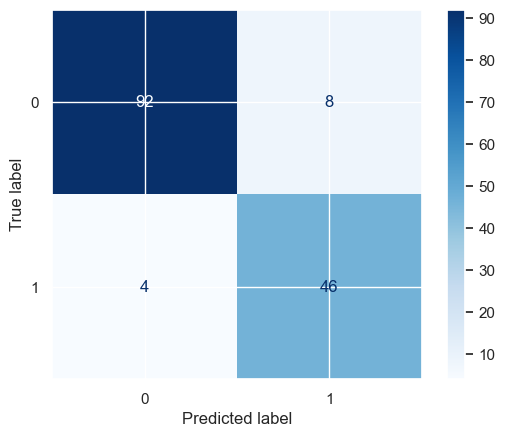

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       100
           1       0.85      0.92      0.88        50

    accuracy                           0.92       150
   macro avg       0.91      0.92      0.91       150
weighted avg       0.92      0.92      0.92       150



In [71]:
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()
gNB.fit(X_train, y_train)
y_pred = gNB.predict(X_test)
y_score = gNB.predict_proba(X_test)[:,1]
plot_confusion_matrix(gNB, X_test, y_test,cmap=plt.cm.Blues)  
plt.show() 

print(classification_report(y_test, y_pred))

### Summary
Summarize findings and draw conclusions.

I performed data exploration and removed missing values in the data from creditcard_train.csv and removed 798 rows. In the next step, I removed outlier data in the dataset. I also did data visualization. From the 31 variables, I found that there are several distributions such as random, normal, right-biased, and left-biased. The finding is as follows: 



1. During the data preparation stage, I explored more data and added the conversion variable hour of Time. It was found that credit card fraud is more likely to occur at 2-5 a.m.

2. I compared the distribution of unknown variables V1-V28 processed by PCA. The variables were distributed differently in the Fraud group and in the Normal group, such as the variables V3, V4, V14, and so on. On the other hand, variables V6, V21, and V24 have the same type of distribution in both groups, but they differ in mean, median, range, and variance.


3. After Applying unsupervised learning methods to achieve dimension reduction, it was found that the fraud data is more extreme than the normal data.

Finally, I compare 3 classification methods for best model performance. The first model is a logistic regression model and we got 94% accuracy on the dataset test. The confusion matrix shows that the model correctly predicted 141 of the 150 values. In the second model, RandomForest, we achieved 92% test accuracy on the dataset. The confusion matrix successfully predicted 138 of the 150 values. The last model is GaussianNB, which was tested with 92% accuracy on the dataset. The confusion matrix results in correctly predicting 138 values out of 150.

In conclusion, I conclude that logistics regression is the best model among 3 different models for this task.
